# 통계 시작
１．표본평균의 분포  
２．표준정규분포에서 신뢰도 $1-\alpha$와 신뢰구간  
３．모평균의 신뢰구간  
４．모비율의 신뢰구간

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import uniform

import matplotlib.pyplot as plt
%matplotlib inline

FLAG_fig = False

#### 표본평균의 분포
표본들의 평균값이 모평균에 가까운 모양인 것을 확인.

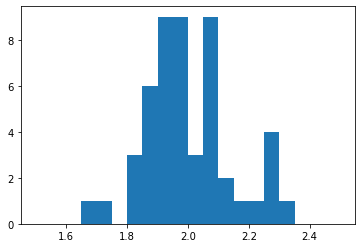

In [3]:
#num을 변경하면 분포가 달라진다
num = 50
N = 10
mean, std = 2, 0.5
mu = np.zeros(num)

for i in range(num):
    mu[i] = np.mean( norm.rvs(loc=mean, scale=std, size=N))

plt.hist(mu, bins=20, range=(1.5, 2.5))
if FLAG_fig: plt.savefig('fig_STAT_Est_SampleMean.png')

#### 구간추정
alpha = 유의수준 <br>
1-alpha = 신뢰수준 <br>
norm.interval() 정규분포 백분위점을 산출하는 함수로, 양끝 두 개의 백분위점을 갖는 튜플을 출력.

In [3]:
alp = 0.01
za, zb = norm.interval(alpha=(1-alp), loc=0, scale=1)
print('za=',za, ' zb=',zb)

za= -2.5758293035489004  zb= 2.5758293035489004


#### 모평균의 신뢰구간
신뢰도를 1-alp 라고 했을 때, 모평균이 존재하는 구간

In [4]:
N = 10
mu_hat = 145.2
std_hat = 23.7
t1 = t.interval( 0.99, df=N-1)
t2 = t.interval( 0.95, df=N-1)
t3 = t.interval( 0.90, df=N-1)
se = std_hat / np.sqrt(N)

In [5]:
print('1-alp = 0.99, interval:', mu_hat + t1[0]*se, mu_hat + t1[1]*se)
print('1-alp = 0.95, interval:', mu_hat + t2[0]*se, mu_hat + t2[1]*se)
print('1-alp = 0.90, interval:', mu_hat + t3[0]*se, mu_hat + t3[1]*se)

1-alp = 0.99, interval: 120.84378885405553 169.55621114594445
1-alp = 0.95, interval: 128.24604132892404 162.15395867107594
1-alp = 0.90, interval: 131.46155538107368 158.9384446189263


#### 모비율의 신뢰구간
국정지지율 예제：샘플수 N, 지지하는 사람은 550명、신뢰도 1- alp <br>
표본의 비율을 통해 모비율을 추정

In [6]:
N=1000
p_hat = 550/N
alp = 0.05
za, zb = norm.interval(alpha=(1-alp), loc=0, scale=1)
se = np.sqrt( p_hat*(1-p_hat)/N )
print('1-alp = ',(1-alp),'  interval:', p_hat+za*se, p_hat+zb*se)
interval1 = zb*se*2

1-alp =  0.95   interval: 0.5191655864637935 0.5808344135362066


위의 예와 마찬가지、다만 샘플수 Nx를 N * coef 라고 하면、coef(coefficient)는 배율을 표시.

In [7]:
coef=4
Nx=N*coef
p_hat = 550*coef/Nx
alp = 0.05
za, zb = norm.interval(alpha=(1-alp), loc=0, scale=1)
se = np.sqrt( p_hat*(1-p_hat)/Nx )
print('1-alp = ',(1-alp),'  interval:', p_hat+za*se, p_hat+zb*se)
interval2 = zb*se*2
print('interval1=',interval1, 'interval2=',interval2)

1-alp =  0.95   interval: 0.5345827932318968 0.5654172067681033
interval1= 0.06166882707241305 interval2= 0.030834413536206525


신뢰구간의 폭을 반으로 줄이기 위해, N의 값을 4배한 모습.

# 가설검정（Hypothesis Testing）

## 평균값의 검정（모분산을 알지 못함） t검정
$$
t = \frac{\hat{\mu} - \mu_0}{\sqrt{\sigma^2 \big/ N}}
$$
위의 $t$검정통계량은 자유도$ df = N - 1 $인 $t$ 분포를 따른다（ $df$: Degree of Freedom）<br>
scipy.stats.t https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html <br>

In [14]:
# -*- coding: utf-8 -*-

import numpy as np
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

FLAG_fig = False

#### 예１：어느 학습，시험 평균점수와 보강의 효용성(단측검정)

In [16]:
data = np.array([1, -1, -2, 3, -1, 5, 4, 0, 7, -1])

In [42]:

test_m = data.mean()
sum = 0.
for i in data :
    sum += (i - test_m)**2
  
pyopyeon = np.sqrt(sum/9)
print(pyopyeon)
print(np.std(data, ddof=1))

3.064129385141706
3.064129385141706


In [43]:
m = np.average(data) # mean
s = np.std(data, ddof=1) # std, ddof=1 : unbiased
N = len(data) # the number of sample
print(m,s,N)

1.5 3.064129385141706 10


In [45]:
alp = 0.05
talp = stats.t.ppf((1-alp),N-1) # 유의수준 0,05 일 때, t0.95
print('talp (alpha=0.05, df=%d) =%f' %((N-1),talp))

m0 = 0 # null hypothesis
t = (m-m0)/(s/np.sqrt(N)) # t값
print('t=', t) 

talp (alpha=0.05, df=9) =1.833113
t= 1.5480470613460082


talp > t 에 의해，H0는 기각할 수 없다. 일반적으로，talp, t 와 같은 pp(percent point)를 구하는 것보다는，
p값(p value)을 구한다. 이것은 다음에 나타낸다.

In [5]:
prob = stats.t.cdf(t,N-1)
print('p value=',1-prob)

p value= 0.07800883831234118


유의수준을 0.05로 하면，p value 쪽이 더 크기 때문에，H0를 기각할 수 없다.

#### 예2：정밀부품의 직경（양측검정）

In [47]:
data2 = np.array([1.5399, 1.5390, 1.5399, 1.5395, 1.5400, 1.5390, 1.5399, 1.5399])
m = np.mean(data2)        # mean
s = np.std(data2, ddof=1) # std, ddof=1 : unbiased
N = len(data2)            # 
df = N - 1               # DoF (degree of freedom)
m0 = 1.54                   # H0 (null hypothesis)
print('sample mean =',m,'  std = ',s,' The number of data = ',N)

sample mean = 1.5396375   std =  0.00042067123233509513  The number of data =  8


In [48]:
t = (m-m0)/(s/np.sqrt(N))   # 샘플로부터 구하는 pp값
prob = stats.t.cdf(t, df)

if t >=  0:
    p = 1 - prob
else:
    p = prob

print('t = ',t)
print('p value =',2*p)

0.02246807961190598
t =  -2.4373067467182707
p value = 0.04493615922381196


주의：위와 같이，t가 음의 값이 될 때에는，p = prob로 한다.  
$\alpha=0.05$라고 두면, p value $< \alpha$ 에 의해 H0를 기각

실은，다음 함수를 이용하면 계산은 쉽다<br>
t, p = scipy.stats.ttest_1samp(data, m0)<br>
data: 샘플 데이터<br>
m0: 귀무가설 H0로 판정한 평균값<br>
t: t값<br>
p: p값，양측검정을 전제로 하고 있다. 단측검정에서는 이 절반의 값을 이용한다.<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [51]:
print(stats.ttest_1samp(data2, m0))
print('t = ',t)
print('both side p = ',p)
print('one  side p = ',p/2)

Ttest_1sampResult(statistic=-2.4373067467182707, pvalue=0.04493615922381196)
t =  -2.4373067467182707
both side p =  0.04493615922381196
one  side p =  0.02246807961190598


## 분산의 검정　（모평균을 알지 못함） $\chi ^2$검정
$$
\chi^2 = \frac{N-1}{\sigma_0^2} \hat{\sigma}^2 \sim \chi^2 (N-1)
$$
위의 $\chi^2$검정통계량은 자유도$ df = N - 1 $인 $\chi^2$（ $df$: Degree of Freedom）<br>
scipy.stats.chi2 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html <br>
$\chi^2$분포는 비대칭인 분포 형태이다.

#### 예３：앞의 정밀부품 직경의 산포도(분산) 검정
분산의 검정이므로 단측검정이다

In [53]:
var = np.var(data2, ddof=1)
print('variance =',var)

var0 = 1.e-7
alp = 0.05
N = len(data2) 
df = N - 1

chi2 = (N-1)*var / var0
chi2_alp = stats.chi2.ppf( (1-alp), df=df)
print('chi2 =',chi2, '  chi2_alp=',chi2_alp)
pval = 1 - stats.chi2.cdf(chi2, df)
print('p value=',pval)

variance = 1.769642857143276e-07
chi2 = 12.387500000002934   chi2_alp= 14.067140449340169
p value= 0.08851446668234408


chi2 < chia2_alp 또는 p value > alp 에 의해，H0를 기각할 수 없다  
평균값의 검정에서，평균값이 어긋난다는 결론을 내린다.
분산의 검정에서 H0를 기각할 수 없기 때문에，사실이라고는 아직 말할 수 없지만，  
이 부품은 높은 정밀도이지만, 낮은 정밀도（Wikipedia 참조）의 가능성이 있다.

## 2표본의 평균값 차이에 대한 검정

2표본，양쪽의 모분산을 모두 모르는 경우를 다룬다. 이 경우 웰치의 t검정（Welch's t-test）을 이용한다.  
검정통계량 $t$는 복잡하므로，다음을 참조하기 바란다：https://en.wikipedia.org/wiki/Welch%27s_t-test  
이 자유도는，웰치 사털드와이트의 식（Welch–Satterthwaite equation）에 의해 근사적으로 구할 수 있다.
https://en.wikipedia.org/wiki/Welch%E2%80%93Satterthwaite_equation  

자유도도 자동적으로 계산하는 함수가 다음의 scipy.stats.ttest_ind,  입력으로 equal_var = False 를 지정한다. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

#### 예4：두 온도계의 성능 검정（독립인 2표본，분산은 알지 못함）

In [10]:
s1 = np.array([37.1, 36.7, 36.6, 37.4, 36.8, 36.7, 36.9, 37.4, 36.6, 36.7])
s2 = np.array([36.8, 36.6, 36.5, 37.0, 36.7, 36.5, 36.6, 37.1, 36.4, 36.7])

In [11]:
t, p = stats.ttest_ind(s1, s2, equal_var = False)
print('t = ',t, ' p value = ',p)

t =  1.6653821449601343  p value =  0.11477658092297612


p value를 보면，alpha = 5% 보다 크기 때문에 H0를 기각할 수 없다. 즉, 두 온도계의 평균값이 동일하다는 가설은 기각할 수 없다.

참고로，자유도의 계산 방식을 소개한다.  
웰치-사털드와이트의 식에 의해 근사자유도를 계산한다.   
https://en.wikipedia.org/wiki/Welch%27s_t-test

In [12]:
s1m = s1.mean()
s1v = s1.var(ddof=1)
s2m = s2.mean()
s2v = s2.var(ddof=1)

bunshi = ((s1v/len(s1)) + (s2v/len(s2)))**2
bunbo = (s1v)**2/((len(s1)**2)*(len(s1)-1)) + (s2v)**2/((len(s2)**2)*(len(s2)-1))
df = bunshi/bunbo
df

16.43885854540649

자유도는 실수가 된다

In [ ]:
prob = stats.t.cdf(t, df)
p = 1-prob
print(2*p)  # 양측검정으로 하면，2*p가 된다

이 결과는 앞의 p value와 일치한다

## 상관과 무상관에 대한 검정
상관계수 $\hat{\rho}$에는 다음 특성이 있다.
$$
- 1 \le \hat{\rho}  \le 1
$$
검정통계량은 다음을 이용한다
$$
t = \frac{{ |\hat \rho _{xy} | \sqrt {N - 2} }}{{\sqrt {1 - \hat \rho _{xy} ^2 } }}
$$
이것은，자유도 $(N-2)$인 $t$분포를 따른다

피어슨 상관계수로 귀무가설(무상관)을 설정한 경우 p값은 양쪽 모두 동시에 계산한다.  
scipy.stats.pearsonr  
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

#### 예5：아버지와 아들의 신장에 대한 상관 검정


In [13]:
x = np.array([168, 172, 181, 179, 166, 185, 177, 176, 169, 161])
y = np.array([111, 125, 129, 120, 126, 133, 130, 116, 118, 115])
corr, pvalue = stats.pearsonr(x,y)
print('corr. coef.=',corr, '  p value=',pvalue)

corr. coef.= 0.6342703173343618   p value= 0.04888299019331427


alp = 0.05 일 때，p value < alp 에 의해，H0（무상관）를 기각,alp = 0.01일 때 기각할 수 없다

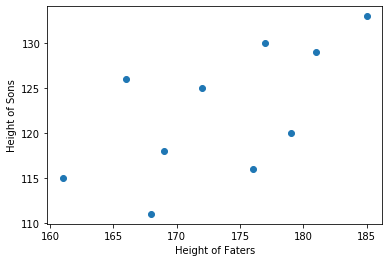

In [14]:
plt.scatter(x,y)
plt.xlabel('Height of Faters')
plt.ylabel('Height of Sons')
if FLAG_fig: plt.savefig('fig_Stat_CorrelationTest.png')